In [1]:
# Import semua library
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from sklearn.model_selection import train_test_split

# Memanggil file
data_mentah = pd.read_csv('../Data/Final Data Minggu ke-3.csv')
padel_1 = pd.read_csv('../Data/Part 1 - Padel final data minggu ke -3/part 1 - smiles final data minggu ke-3 - padel.csv')
padel_2 = pd.read_csv('../Data/Part 2 - Padel final data minggu ke -3/part 2 - smiles final data minggu ke-3 - padel.csv')

In [2]:
# menghapus / drop column Unnamed: 0
data_mentah.drop(columns=['Unnamed: 0'], inplace=True)
print(data_mentah)
data_mentah['Label'].value_counts()

                                                 Smiles  Label   ALogP  \
0     NC(CC(=O)N1CCC[C@H]1C(=O)NCc1ccc(C(=O)O)cc1)Cc...      1 -2.4427   
1         O=C(NCc1ccccc1)[C@@H]1CN[C@H](C(=O)N2CCCC2)C1      1 -2.2658   
2                   N[C@@H](CC(=O)N1CCSC1)Cc1ccc(F)cc1F      1  0.2408   
3                          N[C@H](C(=O)N1CCCC1)C1CCCCC1      1 -2.7535   
4     N[C@H](C(=O)N1CCC(F)(F)C1)[C@H]1CC[C@H](NC(=O)...      1 -1.4117   
...                                                 ...    ...     ...   
7397  C=C1C(=O)O[C@@H]2C[C@@]1(C)OC[C@H]2C1CCC2C3C[C...      0  0.6494   
7398   CCCCCCCCCCCCCCCC(=O)OCC(CO)OC(=O)CCCCCCCCCCCCCCC      0 -7.9855   
7399  CC(=O)O[C@H]1CC[C@@]2(C)[C@@H](CC[C@@H]3[C@@H]...      0  0.5259   
7400  C=C(C)[C@@]12C[C@@H](C)C34OC(Cc5ccccc5)(OC1[C@...      0 -0.5390   
7401  CC(=O)OCC(=O)[C@@]1(OC(=O)c2ccc(Br)o2)C(C)CC2C...      0  1.8646   

         ALogp2       AMR        apol  TopoPSA  Cluster  
0      5.966783   58.5798   64.881618   112.73       

1    3701
0    3701
Name: Label, dtype: int64

In [3]:
# Menggabungkan 2 csv menjadi 1 dataframes
final_padel = pd.concat([padel_1, padel_2])
final_padel.drop(columns=['Name'], inplace=True)
final_padel

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,1,-2.4427,5.966783,58.5798,64.881618,12,12,57,31,26,...,7.494574,62.304634,2.009827,21.475372,9.946865,8.992340,3208.0,45.0,3.039,156.0
1,0,-2.2658,5.133850,54.2512,50.160239,6,6,45,22,23,...,6.692867,44.796652,2.036211,14.562941,5.123292,9.439649,1210.0,28.0,2.432,112.0
2,0,0.2408,0.057985,47.6729,40.564688,6,6,35,19,16,...,8.174147,37.817602,1.990400,16.406860,2.532624,5.857317,781.0,24.0,1.897,94.0
3,0,-2.7535,7.581762,50.6752,38.791446,0,0,37,15,22,...,5.680357,30.110833,2.007389,8.401396,2.533622,5.867773,371.0,19.0,1.802,74.0
4,0,-1.4117,1.992897,62.1044,55.908239,6,6,51,28,23,...,7.866130,56.088275,2.003153,23.996258,5.105960,8.973738,2372.0,43.0,2.902,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,0,0.6494,0.421720,121.5494,78.096548,0,0,70,34,36,...,6.689303,70.862017,2.084177,16.910734,16.910734,0.000000,3032.0,82.0,2.489,218.0
3697,0,-7.9855,63.768210,124.5677,110.951924,0,0,108,40,68,...,5.263951,78.308982,1.957725,13.501724,13.501724,0.000000,9286.0,41.0,14.900,160.0
3698,0,0.5259,0.276571,130.9164,91.378064,0,0,85,37,48,...,6.074648,76.515190,2.067978,17.064733,17.064733,0.000000,3961.0,78.0,6.912,220.0
3699,0,-0.5390,0.290521,134.9816,105.833650,6,6,95,45,50,...,6.509007,92.429343,2.053985,20.446902,20.446902,0.000000,7226.0,93.0,8.136,254.0


In [4]:
data_mentah_smiles = data_mentah.Smiles
data_mentah_smiles

0       NC(CC(=O)N1CCC[C@H]1C(=O)NCc1ccc(C(=O)O)cc1)Cc...
1           O=C(NCc1ccccc1)[C@@H]1CN[C@H](C(=O)N2CCCC2)C1
2                     N[C@@H](CC(=O)N1CCSC1)Cc1ccc(F)cc1F
3                            N[C@H](C(=O)N1CCCC1)C1CCCCC1
4       N[C@H](C(=O)N1CCC(F)(F)C1)[C@H]1CC[C@H](NC(=O)...
                              ...                        
7397    C=C1C(=O)O[C@@H]2C[C@@]1(C)OC[C@H]2C1CCC2C3C[C...
7398     CCCCCCCCCCCCCCCC(=O)OCC(CO)OC(=O)CCCCCCCCCCCCCCC
7399    CC(=O)O[C@H]1CC[C@@]2(C)[C@@H](CC[C@@H]3[C@@H]...
7400    C=C(C)[C@@]12C[C@@H](C)C34OC(Cc5ccccc5)(OC1[C@...
7401    CC(=O)OCC(=O)[C@@]1(OC(=O)c2ccc(Br)o2)C(C)CC2C...
Name: Smiles, Length: 7402, dtype: object

In [5]:
data_mentah.iloc[:,1]
data_mentah_label = pd.DataFrame(data = data_mentah['Label'], columns=['Label'])
data_mentah_label

,Label
0,1
1,1
2,1
3,1
4,1
...,...
7397,0
7398,0
7399,0
7400,0


In [6]:
final_padel.reset_index(drop= True, inplace= True)
final_data = pd.concat([final_padel, data_mentah_label], axis= 1)
# final_data = final_data.join(data_mentah_label)
# final_data.insert(0, "Label", data_mentah_label)
# final_data.insert(0, "Label", data_mentah.iloc[:,1])
# final_data.insert(0, "Smiles", data_mentah_smiles)
final_data

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,Label
0,1,-2.4427,5.966783,58.5798,64.881618,12,12,57,31,26,...,62.304634,2.009827,21.475372,9.946865,8.992340,3208.0,45.0,3.039,156.0,1
1,0,-2.2658,5.133850,54.2512,50.160239,6,6,45,22,23,...,44.796652,2.036211,14.562941,5.123292,9.439649,1210.0,28.0,2.432,112.0,1
2,0,0.2408,0.057985,47.6729,40.564688,6,6,35,19,16,...,37.817602,1.990400,16.406860,2.532624,5.857317,781.0,24.0,1.897,94.0,1
3,0,-2.7535,7.581762,50.6752,38.791446,0,0,37,15,22,...,30.110833,2.007389,8.401396,2.533622,5.867773,371.0,19.0,1.802,74.0,1
4,0,-1.4117,1.992897,62.1044,55.908239,6,6,51,28,23,...,56.088275,2.003153,23.996258,5.105960,8.973738,2372.0,43.0,2.902,148.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7397,0,0.6494,0.421720,121.5494,78.096548,0,0,70,34,36,...,70.862017,2.084177,16.910734,16.910734,0.000000,3032.0,82.0,2.489,218.0,0
7398,0,-7.9855,63.768210,124.5677,110.951924,0,0,108,40,68,...,78.308982,1.957725,13.501724,13.501724,0.000000,9286.0,41.0,14.900,160.0,0
7399,0,0.5259,0.276571,130.9164,91.378064,0,0,85,37,48,...,76.515190,2.067978,17.064733,17.064733,0.000000,3961.0,78.0,6.912,220.0,0
7400,0,-0.5390,0.290521,134.9816,105.833650,6,6,95,45,50,...,92.429343,2.053985,20.446902,20.446902,0.000000,7226.0,93.0,8.136,254.0,0


In [7]:
final_data.dropna(axis=1, inplace=True)
final_data

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,Label
0,1,-2.4427,5.966783,58.5798,64.881618,12,12,57,31,26,...,62.304634,2.009827,21.475372,9.946865,8.992340,3208.0,45.0,3.039,156.0,1
1,0,-2.2658,5.133850,54.2512,50.160239,6,6,45,22,23,...,44.796652,2.036211,14.562941,5.123292,9.439649,1210.0,28.0,2.432,112.0,1
2,0,0.2408,0.057985,47.6729,40.564688,6,6,35,19,16,...,37.817602,1.990400,16.406860,2.532624,5.857317,781.0,24.0,1.897,94.0,1
3,0,-2.7535,7.581762,50.6752,38.791446,0,0,37,15,22,...,30.110833,2.007389,8.401396,2.533622,5.867773,371.0,19.0,1.802,74.0,1
4,0,-1.4117,1.992897,62.1044,55.908239,6,6,51,28,23,...,56.088275,2.003153,23.996258,5.105960,8.973738,2372.0,43.0,2.902,148.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7397,0,0.6494,0.421720,121.5494,78.096548,0,0,70,34,36,...,70.862017,2.084177,16.910734,16.910734,0.000000,3032.0,82.0,2.489,218.0,0
7398,0,-7.9855,63.768210,124.5677,110.951924,0,0,108,40,68,...,78.308982,1.957725,13.501724,13.501724,0.000000,9286.0,41.0,14.900,160.0,0
7399,0,0.5259,0.276571,130.9164,91.378064,0,0,85,37,48,...,76.515190,2.067978,17.064733,17.064733,0.000000,3961.0,78.0,6.912,220.0,0
7400,0,-0.5390,0.290521,134.9816,105.833650,6,6,95,45,50,...,92.429343,2.053985,20.446902,20.446902,0.000000,7226.0,93.0,8.136,254.0,0


In [8]:
# Split data train & data test (REVISIAN)
train_revisi = []
test_revisi = []
for i in range(5):
    train, test = train_test_split(final_data, test_size = 0.3, shuffle=True) 
    train_revisi.append(train)
    test_revisi.append(test)

In [11]:
# Split data train & data test
train, test = train_test_split(final_data, test_size = 0.3, random_state = 42, shuffle=True) 


In [12]:
# set train & test to csv
train.to_csv('../Data/Data Set/Data Train/Data Train.csv', index=None)
test.to_csv('../Data/Data Set/Data Test/Data Test.csv', index=None)

In [13]:
final_data['Label'].value_counts()
train

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,Label
4782,0,0.5935,0.352242,152.0223,103.325994,0,0,98,40,58,...,80.511498,2.012787,16.556456,16.556456,0.000000,4748.0,95.0,9.518,238.0,0
3469,1,-1.2858,1.653282,63.3585,62.803653,12,12,55,34,21,...,68.015603,2.000459,32.600193,12.938132,12.104504,3934.0,51.0,2.553,172.0,1
2579,0,-2.7312,7.459453,39.8206,29.957895,0,0,28,13,15,...,24.986486,1.922037,16.088657,7.319499,5.742949,238.0,17.0,-1.222,62.0,1
1086,0,-4.3848,19.226471,51.5910,41.005446,0,0,39,17,22,...,32.973525,1.939619,18.704994,7.366242,8.309429,562.0,22.0,-1.347,78.0,1
3082,0,-2.9560,8.737936,62.3639,55.880239,6,6,49,26,23,...,52.681024,2.026193,20.494359,5.139238,15.355121,1557.0,44.0,1.933,134.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0,-4.7078,22.163381,111.5027,100.470029,6,6,90,37,53,...,72.749585,1.966205,22.908041,13.782600,3.203316,7670.0,39.0,9.285,164.0,0
5226,0,1.2991,1.687661,132.9472,104.621650,12,12,92,42,50,...,84.761904,2.018141,27.303940,2.520755,19.681744,7224.0,61.0,8.702,214.0,0
5390,0,3.7350,13.950225,137.8655,104.866408,6,6,96,40,56,...,80.277150,2.006929,8.124330,8.124330,0.000000,5409.0,73.0,13.138,218.0,0
860,0,-0.0380,0.001444,54.6634,62.897411,12,12,55,28,27,...,56.587408,2.020979,13.395188,0.000000,8.332395,2404.0,42.0,5.200,142.0,1


In [14]:
# # Seleksi menggunakan - Variance Threshold
# X = final_data.iloc[:1,1:].values
# selector = VarianceThreshold(threshold=0.05)
# selector.fit_transform(X)

In [15]:
# Seleksi menggunakan - pandas pearson correlation 
Y = train
pxs = Y.corr(method='pearson', min_periods=0.2)
pxs = pxs.abs()
pxs

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,Label
nAcid,1.000000,0.195254,0.030766,0.215844,0.164962,0.138887,0.136036,0.168103,0.144601,0.169291,...,0.142203,0.007960,0.149315,0.190870,0.238638,0.053047,0.269042,0.202908,0.202994,0.185118
ALogP,0.195254,1.000000,0.493930,0.250411,0.066587,0.031891,0.030499,0.033064,0.104240,0.006995,...,0.109952,0.090716,0.220407,0.024642,0.316762,0.171070,0.424816,0.183979,0.290582,0.205687
ALogp2,0.030766,0.493930,1.000000,0.255087,0.359786,0.237095,0.236688,0.396964,0.237664,0.454948,...,0.208471,0.304439,0.076108,0.158638,0.120457,0.449263,0.082512,0.378337,0.038234,0.263644
AMR,0.215844,0.250411,0.255087,1.000000,0.891450,0.573894,0.574664,0.905879,0.777795,0.913047,...,0.764458,0.028937,0.233852,0.618488,0.508583,0.657572,0.752540,0.683627,0.769122,0.884415
apol,0.164962,0.066587,0.359786,0.891450,1.000000,0.217307,0.219830,0.993212,0.944824,0.952142,...,0.935725,0.084414,0.052160,0.578883,0.328885,0.873966,0.760552,0.796557,0.868425,0.815124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WPATH,0.053047,0.171070,0.449263,0.657572,0.873966,0.003736,0.005345,0.862965,0.886179,0.792593,...,0.872043,0.005652,0.191637,0.497710,0.113332,1.000000,0.515297,0.663290,0.711556,0.607326
WPOL,0.269042,0.424816,0.082512,0.752540,0.760552,0.121825,0.120997,0.728196,0.802636,0.639657,...,0.820130,0.380366,0.003637,0.522264,0.305642,0.515297,1.000000,0.560713,0.944303,0.643379
XLogP,0.202908,0.183979,0.378337,0.683627,0.796557,0.183930,0.183388,0.798415,0.685761,0.804606,...,0.672524,0.003173,0.364153,0.308602,0.510525,0.663290,0.560713,1.000000,0.618737,0.697774
Zagreb,0.202994,0.290582,0.038234,0.769122,0.868425,0.011375,0.014155,0.830851,0.936968,0.718569,...,0.950565,0.375546,0.151152,0.549868,0.195962,0.711556,0.944303,0.618737,1.000000,0.653463


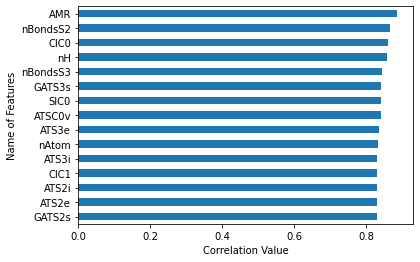

In [16]:
import matplotlib.pyplot as plt
pxs.sort_values(by='Label', inplace=True, ascending=False)
pxs_scor_accuracy = pxs.iloc[1:16,-1]
pxs_scor_accuracy
ax = pxs_scor_accuracy.plot.barh()
plt.xlabel('Correlation Value')
plt.ylabel('Name of Features')
plt.gca().invert_yaxis()
plt.show()

In [17]:
# pxs.sort_values(by='Label', inplace=True, ascending=False)
# pxs_scor_accuracy = pxs.iloc[:,0:]
pxs.drop(columns=['Label'], inplace=True)
# pxs[:100]

In [18]:
name_label_pandasCorr = pxs[:100].index.tolist()
print(name_label_pandasCorr)

['Label', 'AMR', 'nBondsS2', 'CIC0', 'nH', 'nBondsS3', 'GATS3s', 'SIC0', 'ATSC0v', 'ATS3e', 'nAtom', 'ATS3i', 'CIC1', 'ATS2i', 'ATS2e', 'GATS2s', 'MLogP', 'BIC0', 'ATS2p', 'ATS4i', 'nBonds2', 'Si', 'ATS4e', 'ATS3p', 'Sse', 'nBondsS', 'ATS1p', 'ATS0i', 'TIC5', 'apol', 'Spe', 'GATS1s', 'Sp', 'Sare', 'ATS1e', 'TIC4', 'ATS1i', 'ATS0e', 'ATS5i', 'ATS5e', 'ATS6i', 'ATS6e', 'ATS4p', 'bpol', 'ATS8i', 'ATS2v', 'ATS7i', 'TIC3', 'GATS6s', 'nC', 'ATS7e', 'ATS1v', 'ATS5p', 'ATS8e', 'Sv', 'SIC1', 'ATS3v', 'ATS6p', 'ATS0p', 'BIC1', 'GATS7s', 'McGowan_Volume', 'GATS4s', 'ATS7p', 'ATS4v', 'IC0', 'ATS8p', 'GATS5s', 'ATS5v', 'MDEC-12', 'ATS0v', 'GATS8s', 'ATS6v', 'ZMIC0', 'TIC2', 'ATS7v', 'ATS8v', 'EE_Dt', 'CrippenLogP', 'CrippenMR', 'CIC2', 'ATSC0p', 'ZMIC1', 'AATS5e', 'XLogP', 'AATS1e', 'LipinskiFailures', 'SpDiam_Dt', 'SpMax_Dt', 'SIC2', 'AATS4e', 'SpAD_Dt', 'Kier1', 'nHeavyAtom', 'AMW', 'AATS1i', 'Mpe', 'Mare', 'MW', 'WTPT-1']


In [19]:
data_pandas_Corr = train.loc[:,name_label_pandasCorr]
data_pandas_Corr

,Label,AMR,nBondsS2,CIC0,nH,nBondsS3,GATS3s,SIC0,ATSC0v,ATS3e,...,AATS4e,SpAD_Dt,Kier1,nHeavyAtom,AMW,AATS1i,Mpe,Mare,MW,WTPT-1
4782,0,152.0223,101.0,5.390269,58,43.0,0.000000,0.185109,4898.147300,2380.555660,...,7.396171,1212.463772,31.425620,40,5.739014,144.736506,0.940136,0.953469,562.423340,80.511498
3469,1,63.3585,41.0,3.903831,21,20.0,0.932455,0.324756,2446.324593,1068.136260,...,8.166362,751.787623,28.569444,34,8.693571,151.208526,1.023886,1.042036,478.146404,68.015603
2579,1,39.8206,27.0,3.036062,15,12.0,0.879281,0.368455,1493.394534,535.803010,...,7.913964,114.813967,11.076923,13,6.647056,150.406827,0.970448,0.987857,186.117573,24.986486
1086,1,51.5910,38.0,3.611194,22,16.0,0.805772,0.316761,2007.274461,770.433398,...,7.701788,184.330070,15.058824,17,6.235267,151.700706,0.959075,0.975590,243.175422,32.973525
3082,1,62.3639,39.0,4.048208,23,16.0,0.732657,0.279000,2396.871717,962.264824,...,7.768986,465.373095,20.727041,26,7.207861,149.405870,0.969428,0.983265,353.185175,52.681024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0,111.5027,83.0,5.067454,53,30.0,0.000000,0.219413,4928.107842,1698.475968,...,7.277163,908.378997,35.027027,37,7.258562,145.727595,0.939608,0.950844,653.270608,72.749585
5226,0,132.9472,81.0,5.067039,50,31.0,0.000000,0.223271,4885.600963,1773.760902,...,7.285866,956.403067,34.865185,42,6.634226,148.120159,0.941986,0.953478,610.348752,84.761904
5390,0,137.8655,90.0,5.444964,56,34.0,0.000000,0.173121,5044.863992,2104.717868,...,7.228250,966.003256,32.904273,40,5.712739,143.083612,0.930842,0.942500,548.422946,80.277150
860,1,54.6634,44.0,4.348705,27,17.0,0.697435,0.247806,2824.474576,1114.877172,...,7.405682,517.464021,22.680000,28,6.967587,146.496135,0.963494,0.976800,383.217304,56.587408


In [20]:
data_pandas_Corr.to_csv('../Data/Data Set/Data Train/Data Train Pandas Correlation.csv', index=None)

In [21]:
final_data.iloc[:,1:].values

array([[-2.44270000e+00,  5.96678329e+00,  5.85798000e+01, ...,
         3.03900000e+00,  1.56000000e+02,  1.00000000e+00],
       [-2.26580000e+00,  5.13384964e+00,  5.42512000e+01, ...,
         2.43200000e+00,  1.12000000e+02,  1.00000000e+00],
       [ 2.40800000e-01,  5.79846400e-02,  4.76729000e+01, ...,
         1.89700000e+00,  9.40000000e+01,  1.00000000e+00],
       ...,
       [ 5.25900000e-01,  2.76570810e-01,  1.30916400e+02, ...,
         6.91200000e+00,  2.20000000e+02,  0.00000000e+00],
       [-5.39000000e-01,  2.90521000e-01,  1.34981600e+02, ...,
         8.13600000e+00,  2.54000000e+02,  0.00000000e+00],
       [ 1.86460000e+00,  3.47673316e+00,  1.32505900e+02, ...,
         5.17900000e+00,  2.26000000e+02,  0.00000000e+00]])

In [22]:
data

NameError: name 'data' is not defined